Importing Libraries / Packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import Dataset

dts= pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [3]:
dts

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dts['label']=dts['label'].map({'ham':0,'spam':1})

In [6]:
dts

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

SPAM VS HAM

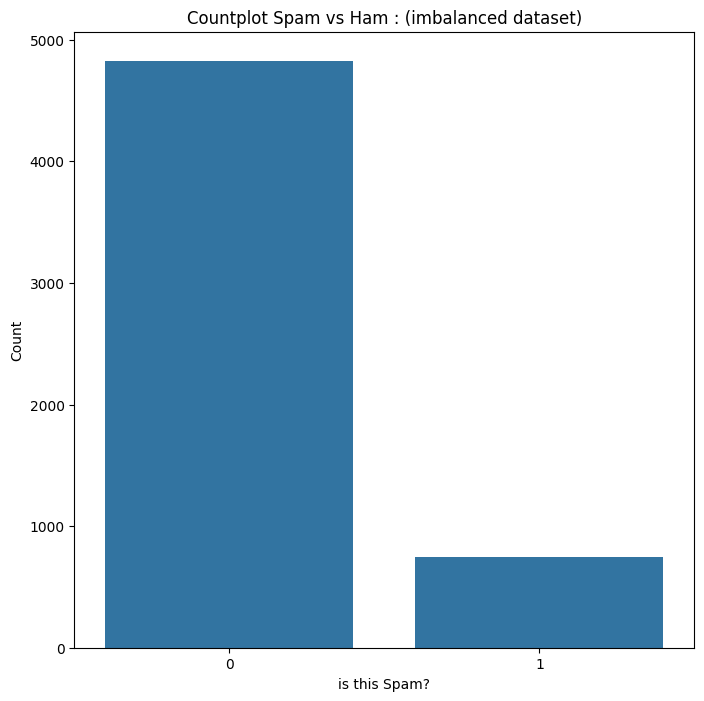

In [17]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data= dts)
p=plt.title("Countplot Spam vs Ham : (imbalanced dataset)")
p=plt.xlabel("is this Spam?")
p=plt.ylabel("Count")

In [10]:
spam=dts[dts['label']== 1]

In [11]:
spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
print("Spams :",len(spam))
print("Ham:",len(dts)-len(spam))

Spams : 747
Ham: 4825


In [15]:
count= int((dts.shape[0]-spam.shape[0])/spam.shape[0])
count

6

In [18]:
for i in range(0,count-1):
    dts= pd.concat([dts,spam])

dts.shape

(9307, 2)

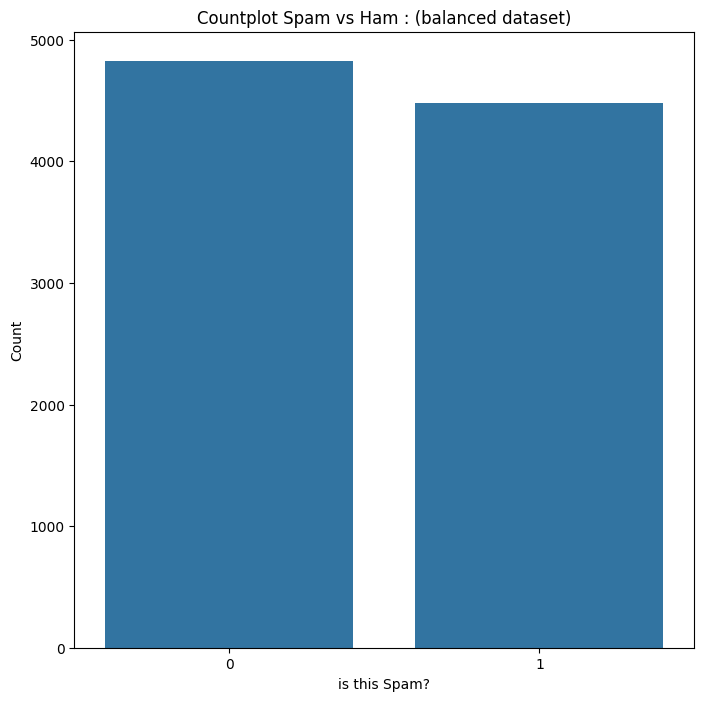

In [19]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data= dts)
p=plt.title("Countplot Spam vs Ham : (balanced dataset)")
p=plt.xlabel("is this Spam?")
p=plt.ylabel("Count")

In [20]:
dts['wcount']=dts['message'].apply(lambda x: len(x.split()))

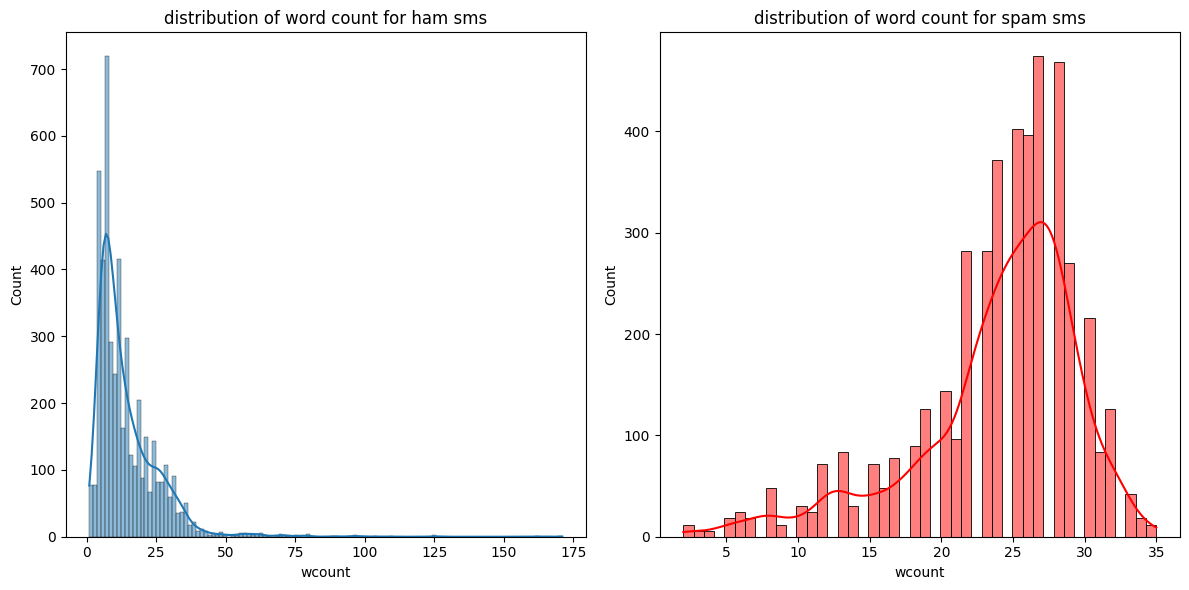

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
g=sns.histplot(dts[dts["label"]==0].wcount,kde=True)
p=plt.title("distribution of word count for ham sms")

plt.subplot(1,2,2)
g=sns.histplot(dts[dts["label"]==1].wcount,color='red',kde="True")
p=plt.title("distribution of word count for spam sms")

plt.tight_layout()
plt.show()

In [32]:
def currency(data):
    currency_symbols = ['$', '€', '£', '¥', '₹']  # Add more symbols if needed
    for i in currency_symbols:
        if i in data:
            return 1
    return 0


In [33]:
dts['currency_symbol_occurence']=dts['message'].apply(currency)

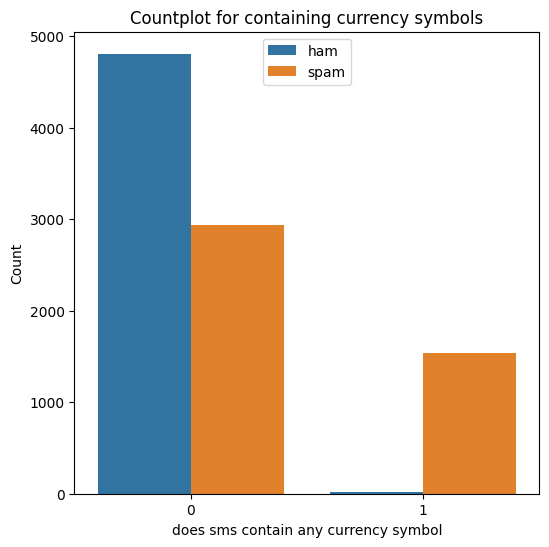

In [34]:
plt.figure(figsize=(6,6))
g=sns.countplot(x='currency_symbol_occurence',data=dts,hue="label")
plt.title("Countplot for containing currency symbols")
plt.xlabel("does sms contain any currency symbol")
p=plt.ylabel("Count")
p=plt.legend(labels=["ham","spam"],loc=9) 

In [35]:
def no(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [36]:
dts['contains_no']=dts["message"].apply(no)
dts

,label,message,wcount,currency_symbol_occurence,contains_no
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


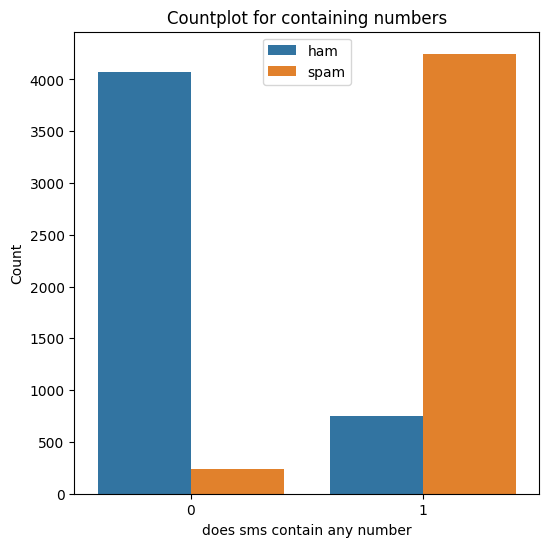

In [38]:
plt.figure(figsize=(6,6))
g=sns.countplot(x='contains_no',data=dts,hue="label")
plt.title("Countplot for containing numbers")
plt.xlabel("does sms contain any number")
p=plt.ylabel("Count")
p=plt.legend(labels=["ham","spam"],loc=9) 

Data Cleaning

In [39]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [43]:
!pip install regex

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import nltk
import re
nltk.download('stopwords')
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.corpus import  wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


In [45]:
from nltk.stem import WordNetLemmatizer

wn1 = WordNetLemmatizer()

In [48]:
corpus=[]
for sms in list(dts.message):
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message = message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wn1.lemmatize(word)for word in filtered_words]
    message=" ".join(lemm_words)

    corpus.append(message)


In [49]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

BAG OF WORDS MODEL CREATION

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names_out()

In [52]:
X=pd.DataFrame(vectors,columns=feature_names)
Y=dts['label']

In [53]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
cv=cross_val_score(mnb,X,Y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [57]:
mnb.fit(X_train,Y_train)
y_pred=mnb.predict(X_test)

In [58]:
cm=confusion_matrix(Y_test,y_pred)

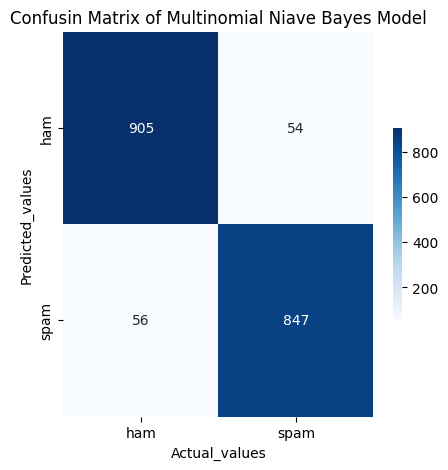

In [62]:
plt.figure(figsize=(5,5))
axis_labels=['ham','spam']

sns.heatmap(data=cm,annot=True,fmt="g",xticklabels=axis_labels,yticklabels=axis_labels,cbar_kws={'shrink':0.5},cmap='Blues')
p=plt.title("Confusin Matrix of Multinomial Niave Bayes Model")
p=plt.xlabel("Actual_values")
p=plt.ylabel("Predicted_values")

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,X,Y,scoring="f1",cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))


0.98
0.003


In [64]:
dt.fit(X_train,Y_train)
y_pred1=dt.predict(X_test)

In [70]:
def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message = message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wn1.lemmatize(word)for word in filtered_words]
    message=" ".join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)


SAMPLE TESTING 

In [74]:
sample= "GET 50 percent discount upto $50 in the Poornima Lakshay Grand Fest...Hurry up..Call 9323772443 "

if predict_spam(sample):
    print("SPAM")
else:
    print("HAM")

HAM


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
